In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('.\\datasets\\homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
2,1440,3,62.0
18,2770,3,102.0
5,1170,2,38.0
14,2250,3,101.0
11,2785,4,140.0


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [4]:
def batch_gradient_descent(x, y_true, epochs, learning_rate=0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_samples= x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, x.T) + bias
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate *w_grad
        bias = bias - learning_rate *b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, bias, cost, cost_list, epoch_list
    


In [5]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]) ,500)
w, b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

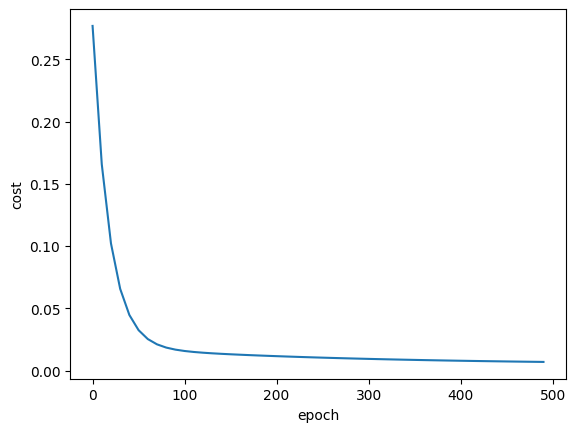

In [6]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [7]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1] * scaled_x[1] + b
    
    price = sy.inverse_transform([[scaled_price]])
    
    return price

In [8]:
predict(1000,2,w,b)

C:\Users\chubbyshady\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

In [9]:
import random

In [10]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate=0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_samples= x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + bias
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate *w_grad
        bias = bias - learning_rate *b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, bias, cost, cost_list, epoch_list

In [11]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]) ,10000)

In [12]:
w_sgd ,b_sgd , cost_sgd

(array([0.70862042, 0.67504854]), -0.23299962220612808, 0.009203265442611186)

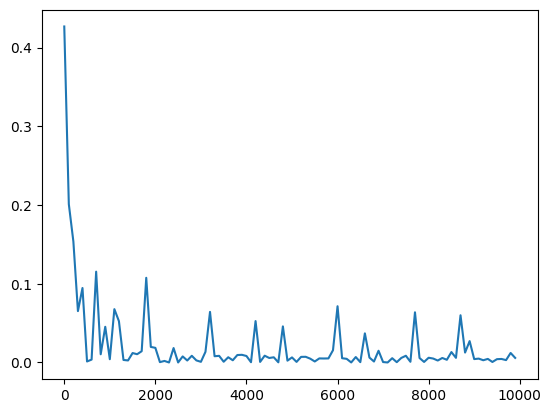

In [13]:
plt.plot(epoch_list_sgd, cost_list_sgd)

In [14]:
predict(1000,2,w_sgd,b_sgd)

C:\Users\chubbyshady\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[29.92543967]])